RMIT University Vietnam

Name: Le Nguyen Khuong Duy

Sid: s4026694

Assignment 2 - OPTION A (PROGRAMMING): Classical AI

# **Applying A\* algorithm to design a path for drone delivery multiple locations in grid-world**
**Requirement:** A delivery company is developing a drone for shipping service. It is required to deliver packages to multiple addresses in the urban city that is full of buildings, or so called `obstacle` that cannot bypassed. The aim of this drone is to deliver the packages on the shortest path as possible. Hence, the problem can be generalised:
- **Initial state:** the given start location
- **Set of action:** 8 direction 
- **Transition model:** the next node a drone can move into that create a shortest path
- **Goal states:** the pre-determined goal locations for delivering packages. The drone must visit all the target locations.
- **Cost:** 
	- **Step cost:** 1 per step. For Euclidean and Octile, diagonal cost 1.414 per step.
	- **Path cost:** Sequence of action, sum of all step in the path

**Solution:** This problem can be classified as informed search, since the target locations are pre-determined. The 2D map that briefly demonstrate the city, the start and targets need to be defined and the *A** *algorithm* is required in order to find the closest route to visit all the targets. Besides, a cost function is the appropriate measurement that calculate the distance between each step of movement to find which node is closer to the next goal.

**Program feature:** This program is presenting the optimal path for the drone to deliver from the start to all targets in a single route. The program also compare the costs of each heuristics and examines time complexity to see the trade-offs between "accuracy" (finding the best optimal route) and "speed" (finding the path at lowest time complexity). It also gives conclusions for the finding route methods. The program will be tested with three maps, including 1 no - solution case, 1 case with 3 targets and 1 case with 5 targets.


## **0. Importing necessary library** 

**Purpose:** Matplotlib is used to plot the map, itertools is used to create permutation of targets, numpy library is to support the calculations in the program and queue library is to set up Priority Queue that improve the a-star algorithm.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
from queue import PriorityQueue 
from itertools import permutations
import numpy as np
import math

## **1. Map representation**
Initially, the city is generated as a 2d map that consist of digits, with the `empty spaces` are `0s`, `obstacles` are `1s`, `start` is 2 and `targets` are `3s`.
Starting location is labeled **green**, and the target locations are **red**. The obstacle is colored **black** then the empty space is in **white**


In [2]:
def map_representation(maze, start, end):
    fig, ax = plt.subplots(figsize=(4, 4))

    # Create a colormap
    color = colors.ListedColormap(['white', 'black', 'green', 'red'])

    # Create the plot
    c = ax.pcolor(maze, cmap=color, edgecolors='k', linewidths=0.5)

    # Set axis ticks to place numbers in the middle of the cells
    ax.set_xticks([x + 0.5 for x in range(len(maze[0]))])
    ax.set_yticks([y + 0.5 for y in range(len(maze))])
    ax.set_xticklabels(range(len(maze[0])))
    ax.set_yticklabels(range(len(maze)))

    # Invert the map to the correct order
    ax.invert_yaxis()

    # Labels
    ax.set_xlabel("Grid world represent the city map")
    ax.xaxis.set_label_position('top')
    ax.set_ylabel("")

    # Legend
    legend_patches = [
        mpatches.Patch(color='white', label='Open space'),
        mpatches.Patch(color='black', label='Obstacle'),
        mpatches.Patch(color='green', label='Start'),
        mpatches.Patch(color='red', label='Target')
    ]
    plt.legend(handles=legend_patches, loc = 'lower left')

    # Show plot
    plt.show()

## **2. Heuristic function**
Heuristic function is a sufficient indicator to lead the way the A* algorithm behave. It is a part of path cost formula f(n) = g(n) + h(n) where g(n) is the cost of the path from start node to current node, and h(n) is the heuristic function that estimate the cost from the current node to the target. 

**Consider the movement of this grid world:** A drone can move left, right, up, down and *four diagonals* in the grid map. It can only move 45 degree diagonal but any direction.

To choose a specific heuristic function, 4 types of heuristic, namely "Chebyshev", "Euclidean", "Octile" and "Manhattan" are brought into consideration:


**`Chebyshev:`**
***<p style="text-align: center;">D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)</p>***
*<p style="text-align: center;">D: Step cost for moving in straight line, which is 1 in this case</p>*
*<p style="text-align: center;">D2: Step cost for moving in diagonal line, which is 1 in this case</p>*

- Pros: Because it treats diagonal direction equal to straightline, it yields the smallest path cost. It can produce the minimum number of moves required. 
- Cons: It may not fully reflect the path cost in reality where movement is not constrained to a grid because it simplifies the diagonal direction to 1
- Heuristic properties: the function is admissible because it is not overestimate the cost in grid-based environment. 

**`Euclidean:`**
***<p style="text-align: center;">(x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5</p>***
*<p style="text-align: center;">(x1, y1): coordinate of the start location</p>*
*<p style="text-align: center;">(x2, y2): coordinate of the target</p>*

- Pros: Euclidean work best in case of moving in any direction, this is in close proximity to real-world problem. It works more sufficient in the non grid-world where movement is not constraint on moving 45 degree diagonally only.
- Cons: As it calculates the straight line distance between two points, in some case, it does not fully reflect path cost of the movement in the 2d grid-based map. Besides, it raise the computation cost by calculating square root, which can be taken longer time to process.
- Heuristic properties: The function is admissible, it always move closer to the target regardless of any direction.

**`Octile:`** 
***<p style="text-align: center;">D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)</p>***
*<p style="text-align: center;">D: Step cost for moving in straight line, which is 1 in this case</p>*
*<p style="text-align: center;">D2: Step cost for moving in diagonal line, which is square root of 2</p>*

- Pros: Work in 8 - direction movement. It consider the diagonal movement as sqrt(2) instead of 1, close to real -world problem but has simpler calculation than Euclidean. In operation, it only perform 2 actions, which is go straight or go 45 degree diagonally, but not in any direction. Thus, it reduces the calculation complexity of the path cost and work sufficient in the context of performing real - world problem in 2d grid map. 
- Cons: Although in the grid-world context, it yields the same path cost as euclidean heuristics, but the way it calculates is different from that of the euclidean. Thus, in real world, it is not sufficient as euclidean distance in determining the best route. 
- Heuristic properties: The function is admissible in the scope of 2d grid map with diagonal movement. It maintain consistency in finding the optimal path.

**`Manhattan:`**
***<p style="text-align: center;">|x2 - x1| + |y2 - y1|</p>***
*<p style="text-align: center;">(x1, y1): coordinate of the start location</p>*
*<p style="text-align: center;">(x2, y2): coordinate of the target</p>*

- Pros: Work best in the case of moving in a square grid, where no diagonal movement is allowed. For this map, it can be used to define the "lowerbound" of the path cost, which is the longest acceptable path that it can get. It got the lowest calculation complexity compare to others.
- Cons: It does not reflect the diagonal movement, so it cannot fully measure the path cost in this context of moving 8 directions.
- Heuristic properties: In this case, where diagonal path is also considered, manhattan distance is not admissible because it overestimate the cost. There will be some case that it cost 2 staightline moves to reach the target while it can be done in diagonal of sqrt(2) or 1 in other functions.

**In general:** 
- Completeness: All of the heuristics above are complete given the finite environment and the targets are reachable.
- Admissible: given the constraint of using 8 directions, only `manhattan` overestimate the distance and would be considered not admissible, while the others are valid.
- Space complexity: O(1)
- Time complexity: O(1)

**Chosen heuristic:**
`Octile heuristic function` is chosen as a heuristic function because it both mimic the Euclidean heuristic function in the scope of 2d grid map, which is close to reality and maintain a lower computation cost of the path compare to Euclidean function. 


In [3]:
def chebyshev_heuristic_function(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    dist = (dx + dy) + (1 - 2) * min(dx, dy)
    return dist

def euclidean_heuristic_function(x1, y1, x2, y2):
    curr = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    return curr

def octile_heuristic_function(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    dist = (dx + dy) + (np.sqrt(2) - 2) * min(dx, dy)
    return dist

def manhattan_heuristic_function(x1, y1, x2, y2):
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)
    return dx + dy

## **3. A\* implementation**

### 3.1. Node
Each node object has 5 components and 2 function:
- `__init_:` a constructor that generate the basic specification of the object it sets the parent, position based on the input and initialize three variables for function calculating heuristic
- `parent:` to record the previous node
- `position:` to know the current location 
- `g:` path cost to the node
- `h:` heuristic cost to the goal. It is based on the chosen heuristics function to determine the cost from current node to the goal.
- `f:` evaluation function that adds up to the estimated total cost of the current node

- `function __eq__:` is used to compare the position of the object to the other when comparing the two objects. It receives two objects and return true if its' position member is the equal
- `function __lt__:` is to compare the evaluation function of the two object.

In [4]:
class Node():
    """A node class for A* search"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0 # PATH-COST to the node
        self.h = 0 # heuristic to the goal: distance heuristic
        self.f = 0 # evaluation function f(n) = g(n) + h(n)

    def __eq__(self, other):
        return self.position == other.position

    # Node comparison and priority: The Node class has been updated to include __lt__ for correct priority queue behavior.

    def __lt__(self, other):
        return self.f < other.f

*Notes:* For the f(n) = g(n) + h(n), the h(n) and the g(n) have to be at the same scale. Otherwise, the definition of f(n) will be violated and error can be made. In this case, the unit of those value is square.

### 3.2. Performing function 

### 3.2.1. Check clog
In the city, there are some situation that the drone cannot bypass. 
Consider this case, when the O is blocked by two diagonal closed space(X), the drone cannot pass the obstacle to reach the target. This should not be a path for the drone but have to find another way instead. Since there are 4 diagonal moves, 4 cases are considered.
|**X**|   |
|---|---|
|**O**|**X**|

|**X**|**O**|
|---|---|
||**X**|

||**X**|
|---|---|
|**X**|**O**|

|**O**|**X**|
|---|---|
|**X**||

To dismissed those case, the checkClog function receives the 2d maze array, current node and previous. It checks if the previous step is diagonal, then check the two neighbor positions to see if it is blocked or not. Since there are four cases of moving diagonally, 4 conditional statements have been defined to check and return false if it is blocked.

In [5]:
def checkClog(maze, node, previous_step):
    if previous_step == (1, 1):														# if the previous step is diagonal
        if maze[node[0] - 1][node[1]] == 1 and maze[node[0]][node[1] - 1] == 1:		# check the neighbor node in straight line 
            return False															# return false if it belongs to the 4 invalid case
    elif previous_step == (-1, -1):
        if maze[node[0] + 1][node[1]] == 1 and maze[node[0]][node[1] + 1] == 1:
            return False
    elif previous_step == (-1, 1):
        if maze[node[0] + 1][node[1]] == 1 and maze[node[0]][node[1] - 1] == 1:
            return False
    elif previous_step == (1, -1):
        if maze[node[0] - 1][node[1]] == 1 and maze[node[0]][node[1] + 1] == 1:
            return False
    
    return True

### 3.2.2. Calculating the total cost of moving of a given path
- This function get the path list and the type of heuristics. The path cost will be calculated according to the heuristic's definition, and it will return the path length as sum of each step. 
- This cost(path, heuristic) function is important to determine the error path where the path length is cubic longer than the longest acceptable path, as there are no way for the start node to meet the target because of the situation when the target is fully surrounded by obstacles. 

In [6]:
def cost(path, heuristic):
	sum = 0 										# initial path cost
	if heuristic == "euclidean":					# consider each given heuristic
		for i in range(1, len(path)):				# loop the path
			dx = abs(path[i][0] - path[i-1][0]) 	# get the path's x coordinate
			dy = abs(path[i][1] - path[i-1][1])		# get the path's y coordinate
			sum += np.sqrt(dx**2 + dy**2)			# calculate the total path cost by the heuristics's definition
		return sum									# return the path cost
	if heuristic == "manhattan":
		for i in range(1, len(path)):
			dx = abs(path[i][0] - path[i-1][0])
			dy = abs(path[i][1] - path[i-1][1])
			sum += dx + dy
		return sum
	if heuristic == "octile":
		for i in range(1, len(path)):
			dx = abs(path[i][0] - path[i-1][0])
			dy = abs(path[i][1] - path[i-1][1])
			if dx == 1 and dy == 1:
				sum += np.sqrt(2)
			else:
				sum += 1
		return sum
	if heuristic == "chebyshev":
		sum = len(path) - 1
		return sum

### 3.3. A* algorithm (check)
For this assignment, A* algorithm has been modified to fit the requirement of reaching muliple targets in one route. 

**Definition**

A* algorithm is an informed search used for pathfinding and graph traversal, which sufficient in finding the shortest path between two points. This search method is informed because it use heuristic function to calculate the distance from the current node to the goal, thus hint the program which node to choose. 

For this type of algorithm, the start and the target nodes have to be determined. The algorithm consist of a heuristic function to calculate on every step, what is the cost to reach the goal when standing in the current coordinate. 

The heuristic function work is wrapped up in this formula: `f(n) = g(n) + h(n)`, where f(n) is the total cost function, g(n) is the cost from the start goal to the current node `n`, and h(n) is a heuristic function that roughly calculate the distance from node `n` to the target.

**Improvement**

To make the program run faster, the priority queue is implemented to quickly get the node with smallest f(n) value. By doing this, the algorithm will always explore the potential path first.

To make the program find shortest path to reach multiple targets, we check where the new node is created to see if it is coincident to the target location. If found, break the loop and restart the start-end coordinate. The previous end will be the new start, and the new end will be the next coordinate in the list.

On every step, index i is increasing by 1 to control the length of path. If it exceed cubic times the lowerbound (estimated cost of start - end calculated by manhattan heuristics function), it will be considered no - solution because it has roughtly moved all the possible step in the map but cannot find the target.



In [7]:
''' DEBUG THE FOLLOWING FUNCTION '''
def astar(maze, startx, endx, heuristic):
    """Returns a list of tuples as a solution from "start" to "end" state in "maze" map using A* search."""
    # Receiver
    i = 0 													# iterator of the target list
    step = 0												# determine how many step the loop has moved to find the target
    choice = []												# list of tuples representing the path
    newRoute = False										# check if it has reach the target. If so, place a signal 
    while i < len(endx):									# Go through all tuples in the list
        if i == 0:
            start = (startx[0], startx[1])					# if this is the first element then set start at the original start
        else:
            start = (endx[i - 1][0], endx[i - 1][1]) 		# set the start to the previous target to continue the itinerary
                   
        current_target = (endx[i][0], endx[i][1])			# reset the current target by moving to the next element in the list
        
        # Create start and end node
        start_node = Node(None, start)
        start_node.g = start_node.h = start_node.f = 0
        end_node = Node(None, current_target)
        end_node.g = end_node.h = end_node.f = 0

        # Initialize both open and closed list
        open_list = PriorityQueue()     					# the open list is organised by priority queue
        closed_list = []               					 	# explored set
        
        # Add the start node
        open_list.put((start_node.f, start_node))

        # Loop until you find the target
        while not open_list.empty():
            step += 1
            
            '''
			on every time the loop start again to determine the current node, we plus 
   			one, so that if the number of step cubic length of a maze, we can consider 
      		it yields a no-solution result
   			'''
      
            if step > len(maze[0]) ** 3:
                return [(-1, -1)]							# [(-1, -1)] means no - solution to reach all target
            
            # Get the current node
            current_node= open_list.get()[1]				# as the open list is priority queue, it always pop up 
            												# the element with smallest f(n) first
            # Pop current off open list, add to closed list
            closed_list.append(current_node)

            # Check if the goal is found
            if current_node == end_node:
                current = current_node
                path = []
                
                # Update the position tuple to path, from start to target
                while current is not None:
                    path.append(current.position)
                    current = current.parent
                i += 1
                
                # Pop the element that is duplicated
                if i < len(endx) and i > 0:
                    path.pop(0)
                    
                # Update the start - target movement to the big path
                for subpaths in path[::-1]:
                        choice.append(subpaths)
                break

            # Expansion: Generate children
            children = []
            
            # Set the default 8 direction movement
            dir = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]
            
            # If the chosen heuristic is manhattan, it can only move in straight line
            if heuristic == "manhattan":
                dir = [(0, -1), (0, 1), (-1, 0), (1, 0)]
            for new_position in dir: # Adjacent squares

                # Get node position                
                node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
                
                # Make sure within range
                if (node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0):
                    continue

                # Make sure not going over the clog            
                if (new_position == (-1, -1) or new_position == (-1, 1) or new_position == (1, -1) or new_position == (1, 1)) and checkClog(maze, node_position, new_position) == False:
                    continue
                
                # Make sure walkable terrain
                if maze[node_position[0]][node_position[1]] == 1:
                    continue

                # Create new node
                new_node = Node(current_node, node_position)

                # Append
                children.append(new_node)

            # Loop through children
            for child in children:
                # Child is on the closed list
                if child in closed_list:
                    continue

                # Try if match then give signal
                if maze[child.position[0]][child.position[1]] == 3 and child.f != 0:
                    i += 1                    
                    newRoute = True
                    break
                
                # Create the f, g, and h values based on the given heuristic option
                child.g = current_node.g + 1
                if heuristic == "euclidean":
                    child.h = euclidean_heuristic_function(child.position[0], child.position[1], end_node.position[0], end_node.position[1])
                elif heuristic == "chebyshev":
                    child.h = chebyshev_heuristic_function(child.position[0], child.position[1], end_node.position[0], end_node.position[1])
                elif heuristic == "manhattan":
                    child.h = manhattan_heuristic_function(child.position[0], child.position[1], end_node.position[0], end_node.position[1])
                elif heuristic == "octile":
                    child.h = octile_heuristic_function(child.position[0], child.position[1], end_node.position[0], end_node.position[1])

                child.f = child.g + child.h
                
                # Child is already in the open list
                in_open_list = False
                for item in open_list.queue:
                    open_node = item[1]
                    if child == open_node and child.g > open_node.g:
                        in_open_list = True
                        break
                
                # Add the child to the open list if it's not already in it
                if not in_open_list:
                    open_list.put((child.f, child))
                    
			# If detect the target, reset the variables and break to continue the next target
            if newRoute == True:
                newRoute = False
                break
    return choice


## **4. Evaluation**


## 4.1. Display the optimal path

This function is to display an optimal path. it is installed with matplotlib's configuration and setting up parameters to plot the map graphically. Color library is the same to the original representation map and the legend is also installed. After the map is plotted, lines will be splitted into x and y list of coordinates. The row and column are also reformatted to have a clear view.

In [8]:
def display(maze, paths, heuristic):
    # Set up the size of the map
	plt.figure(figsize = (4, 4))

	# Set the parameter for the boundary block
	plt.rcParams["figure.autolayout"] = True
	plt.rcParams["axes.edgecolor"] = "black"
	plt.rcParams["axes.linewidth"] = 2.50

	# Draw the original map with start, goals and obstacles
	color = colors.ListedColormap(['white', 'black', 'green', 'red'])	# white for open space, black for obstacles green for start and red for the targets
	plt.imshow(maze, cmap = color)
	plt.title("Drone's optimal path to ship packages \nin the grid world", fontsize=10)    

	# Plot the lines        
	x = [point[1] for point in paths]
	y = [point[0] for point in paths]

	# Plot the line
	plt.plot(x, y, 'bo-', label = "Octile Path")

	# Draw the borderline of each cell
	nrows, ncols = len(maze), len(maze[0])
	for i in range(nrows + 1):
		plt.axhline(i - 0.5, color='black', linewidth=0.5)
	for j in range(ncols + 1):
		plt.axvline(j - 0.5, color='black', linewidth=0.5)

	# Add legend and label each type of color with names
	legend_patches = [
		mpatches.Patch(color='white', label='Open space'),
		mpatches.Patch(color='black', label='Obstacle'),
		mpatches.Patch(color='green', label='Start'),
		mpatches.Patch(color='red', label='Target'),
		plt.Line2D([0], [0], color='blue', marker='o', linestyle='--', label='Path')
	]
	# Locate the legend table
	plt.legend(handles=legend_patches, loc='upper right')

	plt.show()

## 4.2. Plot the map with path horizontally for comparison

This function is visualizing the path in the city map by different heuristics. Given the optimal path that reach all targets, it plot them out and display 4 map in horizontal for easy comparation. It also display the name, path length and the path cost in each heuristic.

In [9]:
def plot_grid_with_path(ax, maze, path, output):
    
	# Plot the grid map
    color = colors.ListedColormap(['white', 'black', 'green', 'red'])
    ax.imshow(maze, cmap = color, origin = 'upper')
    
    # Plot the path
    path_x, path_y = zip(*path)
    ax.plot(path_y, path_x, 'bo--', label = "Path")

    # Add labels and title
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    
    # Print the path length and path cost of each heuristic with the result map, and locate it sufficiently
    if output != "fastest" and output != "shortest":
        ax.set_title(f"Delivering path if use {output} heuristic")
        ax.text(0.5, -0.2, ("Path length: " + str(len(path))), ha='center', va='center', transform=ax.transAxes)
        ax.text(0.5, -0.3, ("Path cost (according to it's definition): " + str(cost(path, output))), ha='center', va='center', transform=ax.transAxes)            
    else:
        # Print the fastest or shortest path and locate the information so that it is easy to see
        ax.set_title(f"{output} path")
        ax.text(0.5, -0.2, ("Path length: " + str(len(path))), ha='center', va='center', transform=ax.transAxes)        
        
    legend_patches = [
        mpatches.Patch(color='white', label='Open space'),
        mpatches.Patch(color='black', label='Obstacle'),
        mpatches.Patch(color='green', label='Start'),
        mpatches.Patch(color='red', label='Target'),
        plt.Line2D([0], [0], color='blue', marker='o', linestyle='--', label='Path')
	]
    # Add a single legend combining path and grid color legends
    ax.legend(handles=legend_patches, loc='best')

## 4.3. Find the most optimal path

This function is to find the most optimal path. It permutate all target order and try them all to see which permutation has the lowest cost. It returns the most optimal order of targets, not the actual path, so the heuristic option is set to 'octile' by default.

In [10]:
def find_optimal_path(maze, start_tuple, end):
    # Set the original minimal path cost to infinity
	min_path_cost = np.inf

	# Loop all permustation of the target
	for optimal_dist in permutations(end):
		maze_analysing = maze
		ans = astar(maze_analysing, start_tuple, optimal_dist, "octile") # test all the case
		
		# Compare to save the shortest path in every permutation
		if min_path_cost > len(ans):
				min_path_cost = len(ans)
				saved_optimal = optimal_dist
	return saved_optimal

## 4.4. Find the least time complexity path

This function will return the sub-optimal path that at a short amount of time. It calculate the distances from the start position to multiple targets, then return the list of targets in ascending order based on their distance from the start node.

In [11]:
def cal_dist(maze, start, end):
    dist_arr = []
	
	# Calculate the distance between start node to each target node and then add the tuple contain distance, coordinate to the distance list
    for i in range(0, len(end)):
        dist = octile_heuristic_function(start[0], start[1], end[i][0], end[i][1])
        dist_arr.append((dist, (end[i][0], end[i][1])))

	# Sort the list by the first element in the distance array
    sorted_data = sorted(dist_arr, key=lambda x: x[0])

	# Get data of the coordinate out of the already sorted node list 
    shortestPath = []
    for i in range(0, len(end)):
        shortestPath.append(sorted_data[i][1])
    return shortestPath

## **5. Main Function**

## 5.1. City map
Map is represented as 0s for open spaces and 1s for obstacles in this block. Start and end locations are also set here and plot to the map. 2 represent start point and 3s represent target points.

In [12]:
def citymap(maze_id):
	if maze_id==1:
		maze = [[0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
				[0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
				[0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
				[0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
				[1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
				[0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
				[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
				[0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
				[1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
				[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]
		start = (5, 0)									# set start coordinate
		maze[start[0]][start[1]] = 2					# set start location in maze = 2
		end = [(9, 9), (0, 1), (2, 6)]					# set targets
		for target in end:
			maze[target[0]][target[1]] = 3				# set each target in the maze = 3

		return(maze, start, end)						# return the maze, that start tuple and the target tuple list
	elif maze_id == 2:
		maze = [[0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
				[0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
				[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
				[1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
				[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
				[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
				[0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
				[0, 0, 0, 1, 0, 1, 1, 1, 0, 0],
				[0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
				[0, 0, 0, 1, 0, 1, 0, 0, 1, 0]]
		start = (7, 4)
		maze[start[0]][start[1]] = 2
		end = [(4, 1), (5, 6), (5, 9)]
		for target in end:
			maze[target[0]][target[1]] = 3

		return(maze, start, end)

	elif maze_id == 3:
		maze = [[0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
				[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
				[0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
				[1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
				[0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
				[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
				[1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
				[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
				[1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
				[1, 1, 0, 0, 0, 1, 0, 0, 1, 0]]
		start = (8, 5)
		maze[start[0]][start[1]] = 2
		end = [(2, 6), (7, 9), (7, 8), (0, 6)]
		for target in end:
			maze[target[0]][target[1]] = 3

		return(maze, start, end)

## 5.2. Main function

The main function get the mapdata, representing it in matplotlib for a better visualization. It display the start, targets coordinate as list and all the result of the path including all the reachable/unreachable cases. It finds both the best optimal solution based on octile heuristic and the shortest path of that solution.

In [13]:
def main(maze, start, end):
	# drawing the original 2d map 
	map_representation(maze, start, end)

	# print start tuple and target list
	print("start: ", start)
	print("list of targets: ", end)

	# list of heuristics options
	heuristics = ["euclidean", "octile", "manhattan", "chebyshev"]

	# find the optimal solution based on permutation of the target list
	best_sol = find_optimal_path(maze, start, end)
 
	# find the shortest path list given the start and list of targets
	ans = astar(maze.copy(), start, best_sol, "octile")
 
	# if the target is unreachable, it will return the solution [(-1, -1)]
	if ans == [(-1, -1)]:
		print("error, there exist unreachable target(s)")
	else:
		# print the optimal itinerary 
		print("best itinerary: ", best_sol)  
		
  		# print the shortest path based on that itinerary
		print("most optimal path: ", ans)  
  
		# print path length
		print("optimal path length : ", len(ans))
  
		# display the path and the grid map
		display(maze.copy(), ans, "octile")

		#PRINT THE PATH WITH 4 DIFFERENT HEURISTICS IN ONE ROW
		fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

		# EVALUATE THE HEURISTICS
		i = 0 # to place the maze in subplot in the continuous order
		for heuristic in heuristics:
			ans = astar(maze.copy(), start, best_sol, heuristic)
			plot_grid_with_path(axes[i], maze.copy(), ans, heuristic)
			i += 1 # increase by 1 to display the map of each each heuristic to subplot


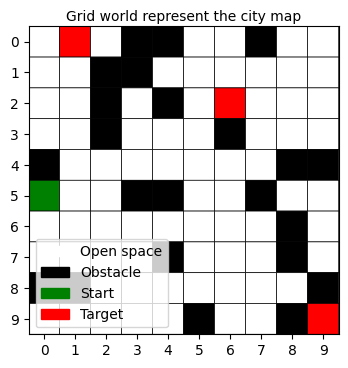

start:  (5, 0)
list of targets:  [(9, 9), (0, 1), (2, 6)]
error, there exist unreachable target(s)


In [14]:
# retrieve data of the maze, start and list of targets
maze, start, end = citymap(1)			
main(maze, start, end)

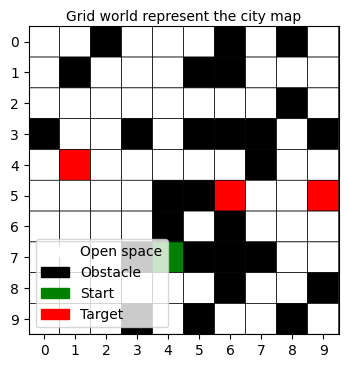

start:  (7, 4)
list of targets:  [(4, 1), (5, 6), (5, 9)]
best itinerary:  ((4, 1), (5, 6), (5, 9))
most optimal path:  [(7, 4), (8, 3), (7, 2), (6, 1), (5, 1), (4, 1), (5, 2), (5, 3), (4, 4), (4, 5), (5, 6), (5, 7), (5, 8), (5, 9)]
optimal path length :  14


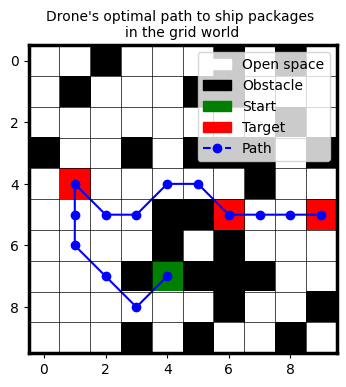

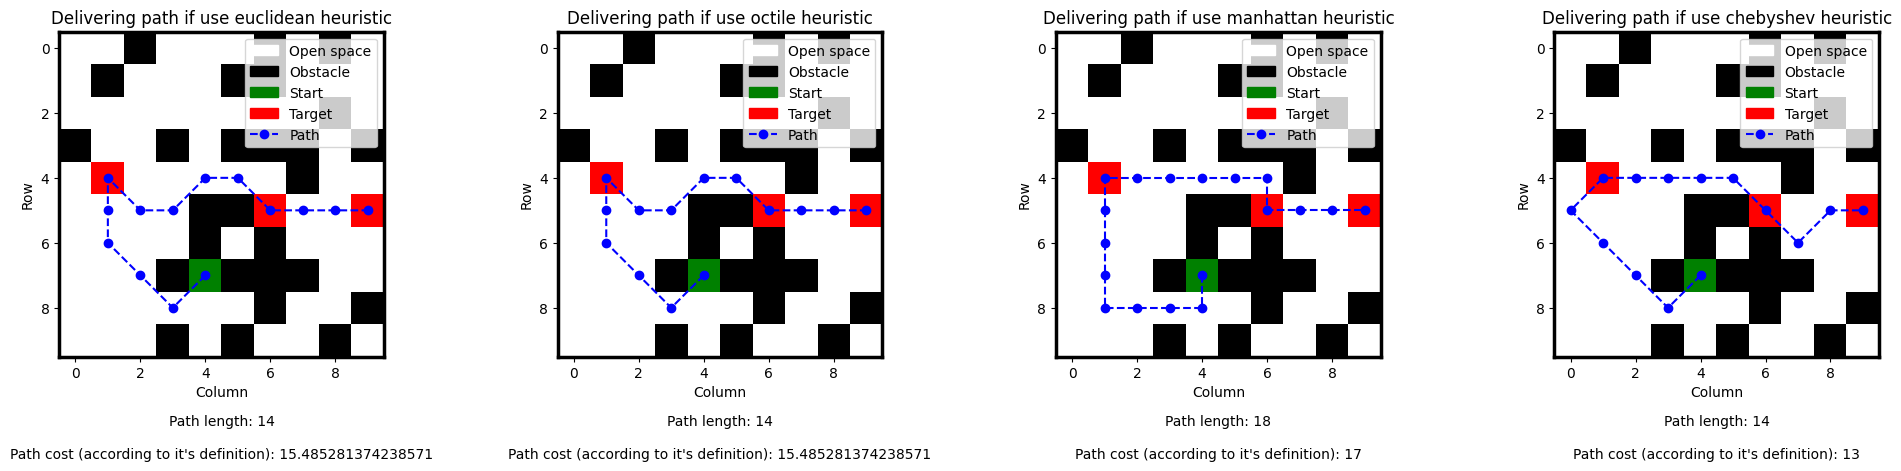

In [15]:
# retrieve data of the maze, start and list of targets
maze, start, end = citymap(2)			
main(maze, start, end)

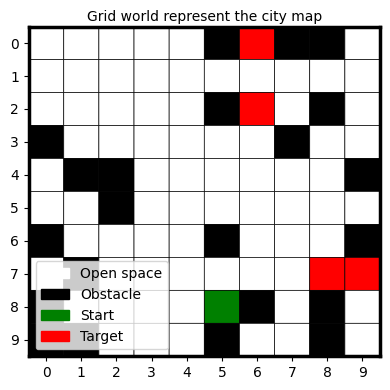

start:  (8, 5)
list of targets:  [(2, 6), (7, 9), (7, 8), (0, 6)]
best itinerary:  ((7, 8), (7, 9), (2, 6), (0, 6))
most optimal path:  [(8, 5), (7, 6), (7, 7), (7, 8), (7, 9), (6, 8), (5, 7), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6)]
optimal path length :  12


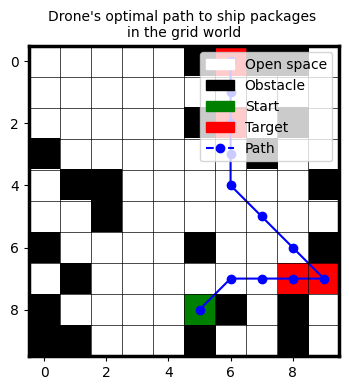

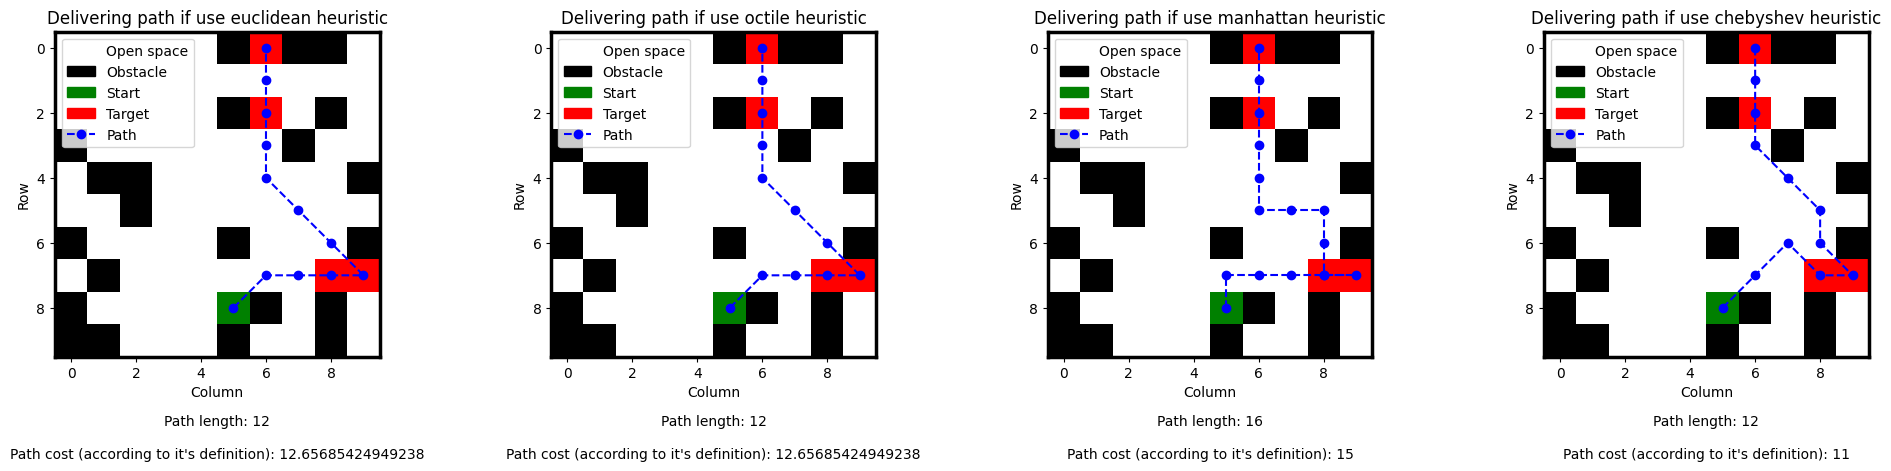

In [16]:
# retrieve data of the maze, start and list of targets
maze, start, end = citymap(3)			
main(maze, start, end)

# **6. Evaluation**
To evaluate the search method, and answer the question on how speed and accuracy influence the itinerary and the route, two method has been implemented. The first method is to permutate all targets to find the shortest path, and the other method is to compare octile distance between the start to all targets and sort the list in the ascending order.

In [17]:
def evaluate(maze, start, end):
	# print the original start and list of targets
	print("start: ", start)
	print("list of targets: ", end)

	# find the best solution by permutation
	best_sol = find_optimal_path(maze, start, end)

	# return the fastest solution base on octile heuristic function comparing to the target.
	fast_sol = cal_dist(maze, start, end)

	# this calculation check if the solution is not found
	ans = astar(maze.copy(), start, fast_sol, "octile")
	if ans == [(-1, -1)]:
		print("error, there exist unreachable target(s)")
	else:
		# PRINT THE MAPS APPLYING TWO METHODS
		fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

		# EVALUATE THE PATH: shortest
		ans1 = astar(maze.copy(), start, best_sol, "octile")
		plot_grid_with_path(axes[0], maze.copy(), ans1, "shortest")

		# EVALUATE THE PATH: fastest
		ans2 = astar(maze.copy(), start, fast_sol, "octile")
		plot_grid_with_path(axes[1], maze.copy(), ans2, "fastest")
		
		# print out the performance
		print("shortest path: ", ans1)
		print("fastest path: ", ans2)
		print("performance (fastest / shortest): ", len(ans2) / len(ans1))
		print("time complexity of shortest path O(n!): ", math.factorial(len(end)))
		print("time complexity of fastest path O(n*log(n)): ", len(end) * math.log(len(end)))
		print("space complexity of shortest path (b**d)): ", 8 ** len(ans1))
		print("space complexity of fastest path (b**d)): ", 8 ** len(ans2))

## **6.1. Evaluate in three different map**

In [18]:
# retrieve data of the maze, start and list of targets
maze, start, end = citymap(1)
#analyzing map 1
evaluate(maze, start, end)  

start:  (5, 0)
list of targets:  [(9, 9), (0, 1), (2, 6)]
error, there exist unreachable target(s)


start:  (7, 4)
list of targets:  [(4, 1), (5, 6), (5, 9)]
shortest path:  [(7, 4), (8, 3), (7, 2), (6, 1), (5, 1), (4, 1), (5, 2), (5, 3), (4, 4), (4, 5), (5, 6), (5, 7), (5, 8), (5, 9)]
fastest path:  [(7, 4), (8, 3), (7, 2), (6, 3), (5, 3), (4, 4), (4, 5), (5, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (5, 2), (5, 3), (4, 4), (4, 5), (5, 6), (5, 7), (5, 8), (5, 9)]
performance (fastest / shortest):  1.5
time complexity of shortest path O(n!):  6
time complexity of fastest path O(n*log(n)):  3.295836866004329
space complexity of shortest path (b**d)):  4398046511104
space complexity of fastest path (b**d)):  9223372036854775808


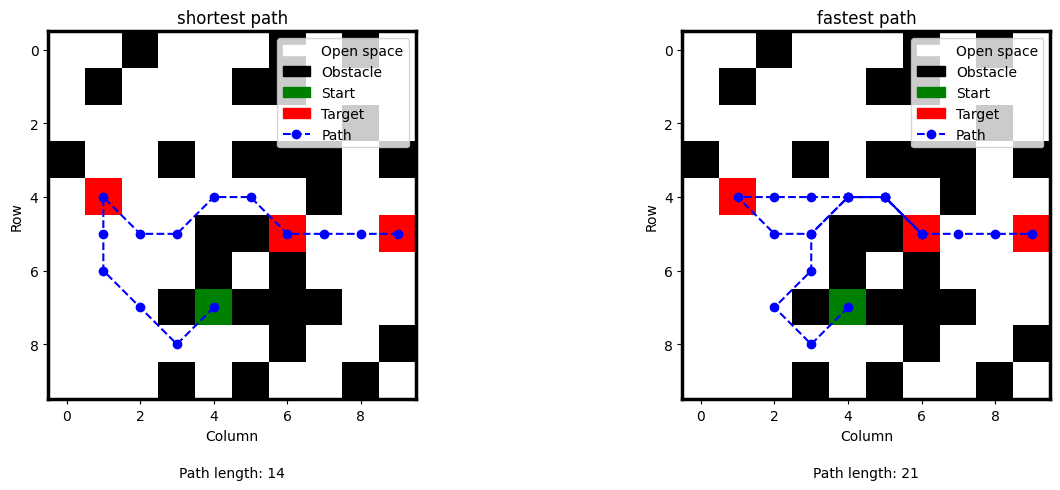

In [19]:
# retrieve data of the maze, start and list of targets
maze, start, end = citymap(2)
#analyzing map 2
evaluate(maze, start, end)  

start:  (8, 5)
list of targets:  [(2, 6), (7, 9), (7, 8), (0, 6)]
shortest path:  [(8, 5), (7, 6), (7, 7), (7, 8), (7, 9), (6, 8), (5, 7), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6)]
fastest path:  [(8, 5), (7, 6), (7, 7), (7, 8), (7, 9), (6, 8), (5, 7), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6)]
performance (fastest / shortest):  1.0
time complexity of shortest path O(n!):  24
time complexity of fastest path O(n*log(n)):  5.545177444479562
space complexity of shortest path (b**d)):  68719476736
space complexity of fastest path (b**d)):  68719476736


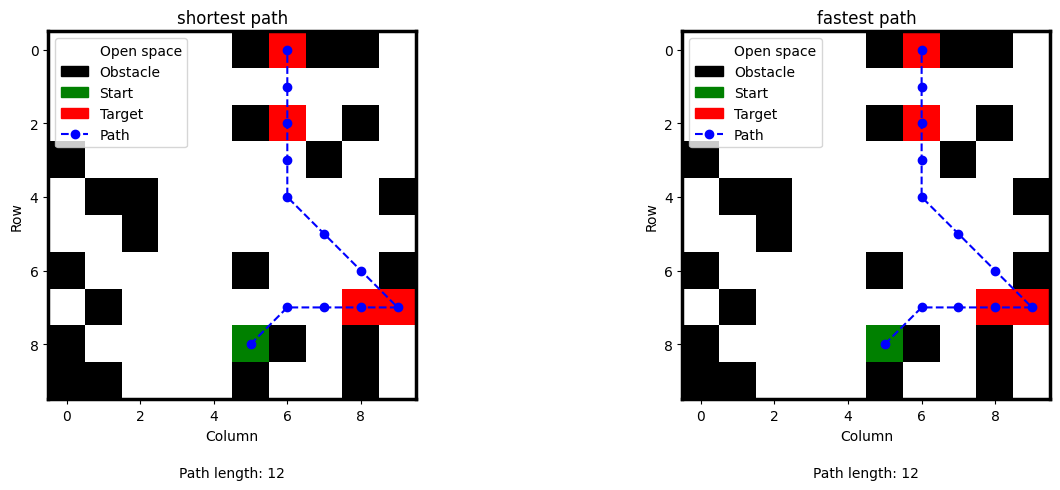

In [20]:
# retrieve data of the maze, start and list of targets
maze, start, end = citymap(3)
#analyzing map 3
evaluate(maze, start, end)  

# **7. Conclusion**

***<p style="text-align: center;">**Limitation**</p>***
- The sufficient way to find the optimal path took too long to run.
- The more target to consider, the more exponential the time it cost.
- The fastest time complexity solution yields to much space complexity as more computing step is required.

***<p style="text-align: center;">**A\* search function**</p>***

**Pathfinding Completeness:** The search algorithm ensure all targets are visited. On the condition that all targets are reachable, the search is 100% complete with at least 1 solution found. Considering the 8-direction movement, if the heuristic function used is admissable and action costs are non negative, the cost to reach the goal will be consistent and maintain to find the shortest node for the path.

**Time complexity:** O(b ^ d) (b is the branching factor and d is the number of nodes in the path result)

**Runtime:** O(n\*n*d) (n: size of each nested loop  and d is 8 direction)

**Space complexity:** O(n) (Include priority queue and 2 1-dimensional arrays)

**Cost optimality:** As of the chosen heuristic, the h(n) of each chosen node that reach the target is smaller over time compared to the start, hence, the cost for reaching the goal is ensure to be optimal. 

**Search cost:** In this program, the optimal solution return the least search cost while in the worst case, the fastest time complexity method may raise the search cost to the highest. 
- On map(2), the time complexity of the shortest path is twice that of the fastest path. On the contrary, the space complexity of the shortest path is much smaller than the other. But on map(3), both method return the same answer and the same space complexity but the time complexity of the shortest path is five times larger than that of the fastest path. This is important to consider the tradeoff between fast and accuracy when considering this delivery problem.


For the optimal solution, it **depends** on the ability to move in the given environment. The `Euclidean distance` is more effective in the real world, while the `Octile distance` perform the same as but less computation power compare to `Euclidean distance` in the grid map.


***<p style="text-align: center;">**Further improvement**</p>***
- Try and test the travel salesman problem (TSP) heuristic.
- Update the feature, so that the drone can go back to the original start after finishing delivery.